# Homework 3 - Pairwise Alignments

#### (1) Using Biopython, perform a pairwise sequence alignment for the following sequences `MTPARGSALS` and `MTPVRRSLS`. Use a match score of 2, a mismatch score of -1 and a gap open of -2 and a gap extension score of -1. What is the alignment and final score?  How many optimal alignments were found?

In [2]:
from Bio import Seq, pairwise2
seq1 = Seq.Seq("MTPARGSALS")
seq2 = Seq.Seq("MTPVRRSLS")

aln = pairwise2.align.globalms(seq1,seq2,2,-1,-2,-1)
print(aln)


[Alignment(seqA='MTPARGSALS', seqB='MTPVRRS-LS', score=10.0, start=0, end=10)]


/home/jupyter-melawady26/.local/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [3]:
#alingment view
print(pairwise2.format_alignment(*aln[0]))
#score is 10

MTPARGSALS
|||.|.| ||
MTPVRRS-LS
  Score=10



In [4]:
#num of obtimal alignments
len(aln)

1

#### (2) For the same two sequences, find the optimal alignment using the [EMBOSS Needle application](https://www.ebi.ac.uk/Tools/psa/emboss_needle/). Calculate the scores and optimal alignments using the BLOSUM62, PAM250, and PAM30 similarity matrices. Have a gap open penalty of 1 and a gap extension penalty of 1. Copy the results below.

*You are performing the alignment 3 times for this question.*


##### BLOSUM62

Score = 31.0

optimal alignments = 1

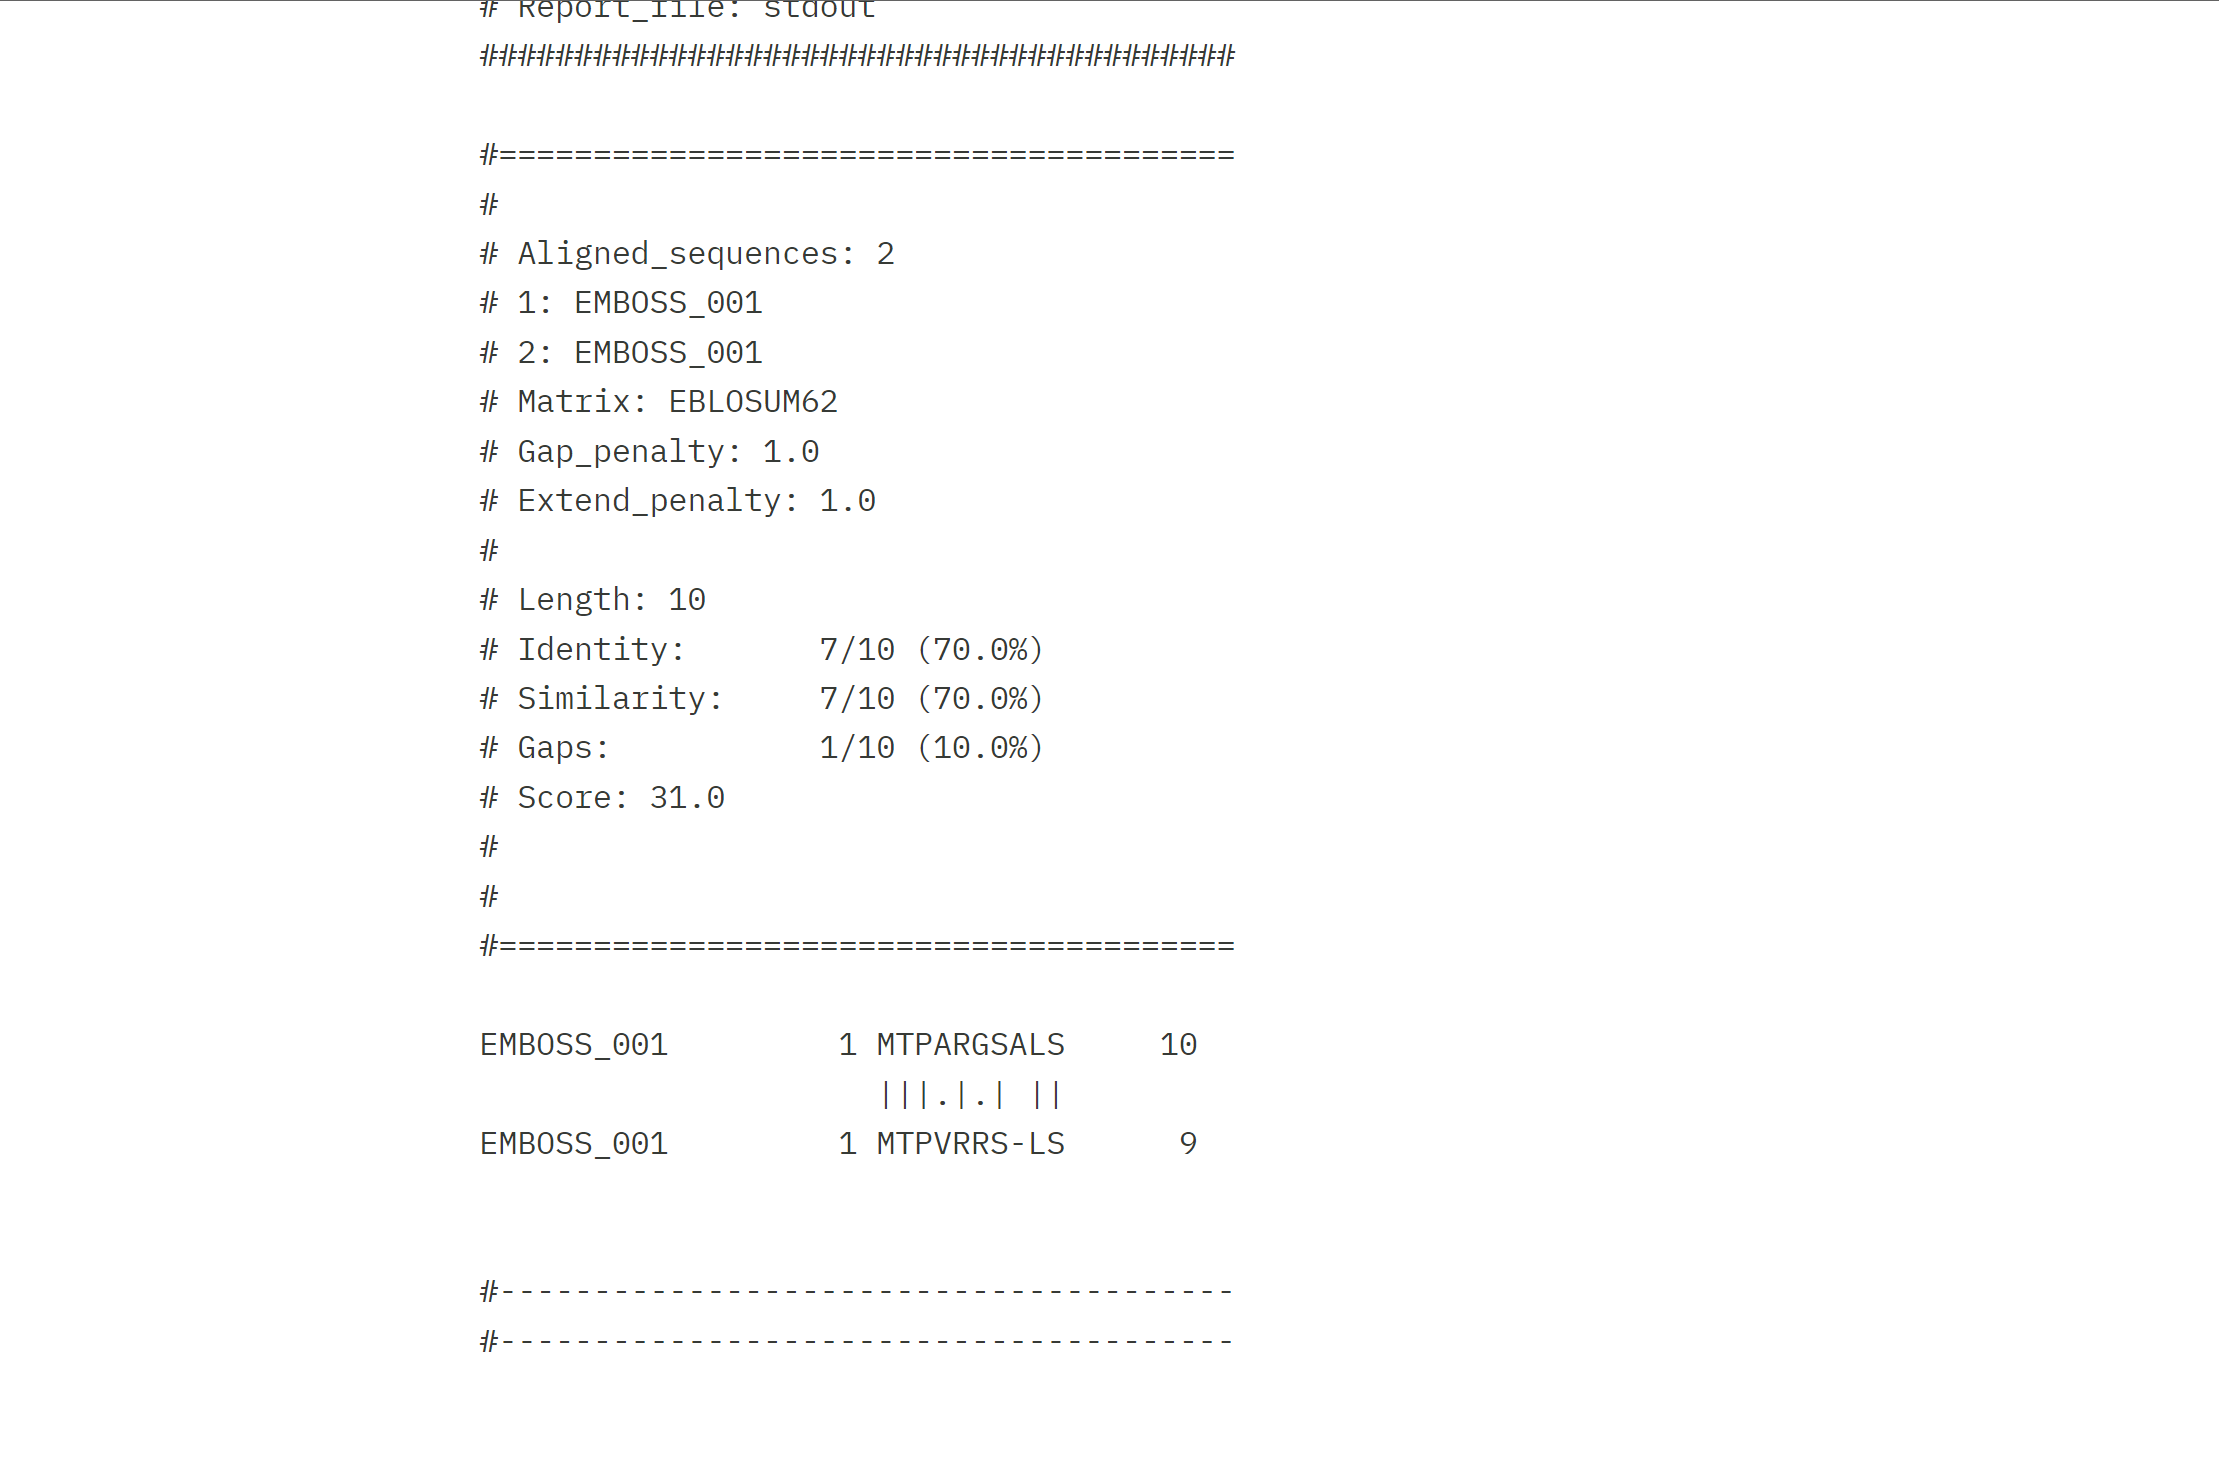

#### PAM250

score = 29

optimal alignments = 1

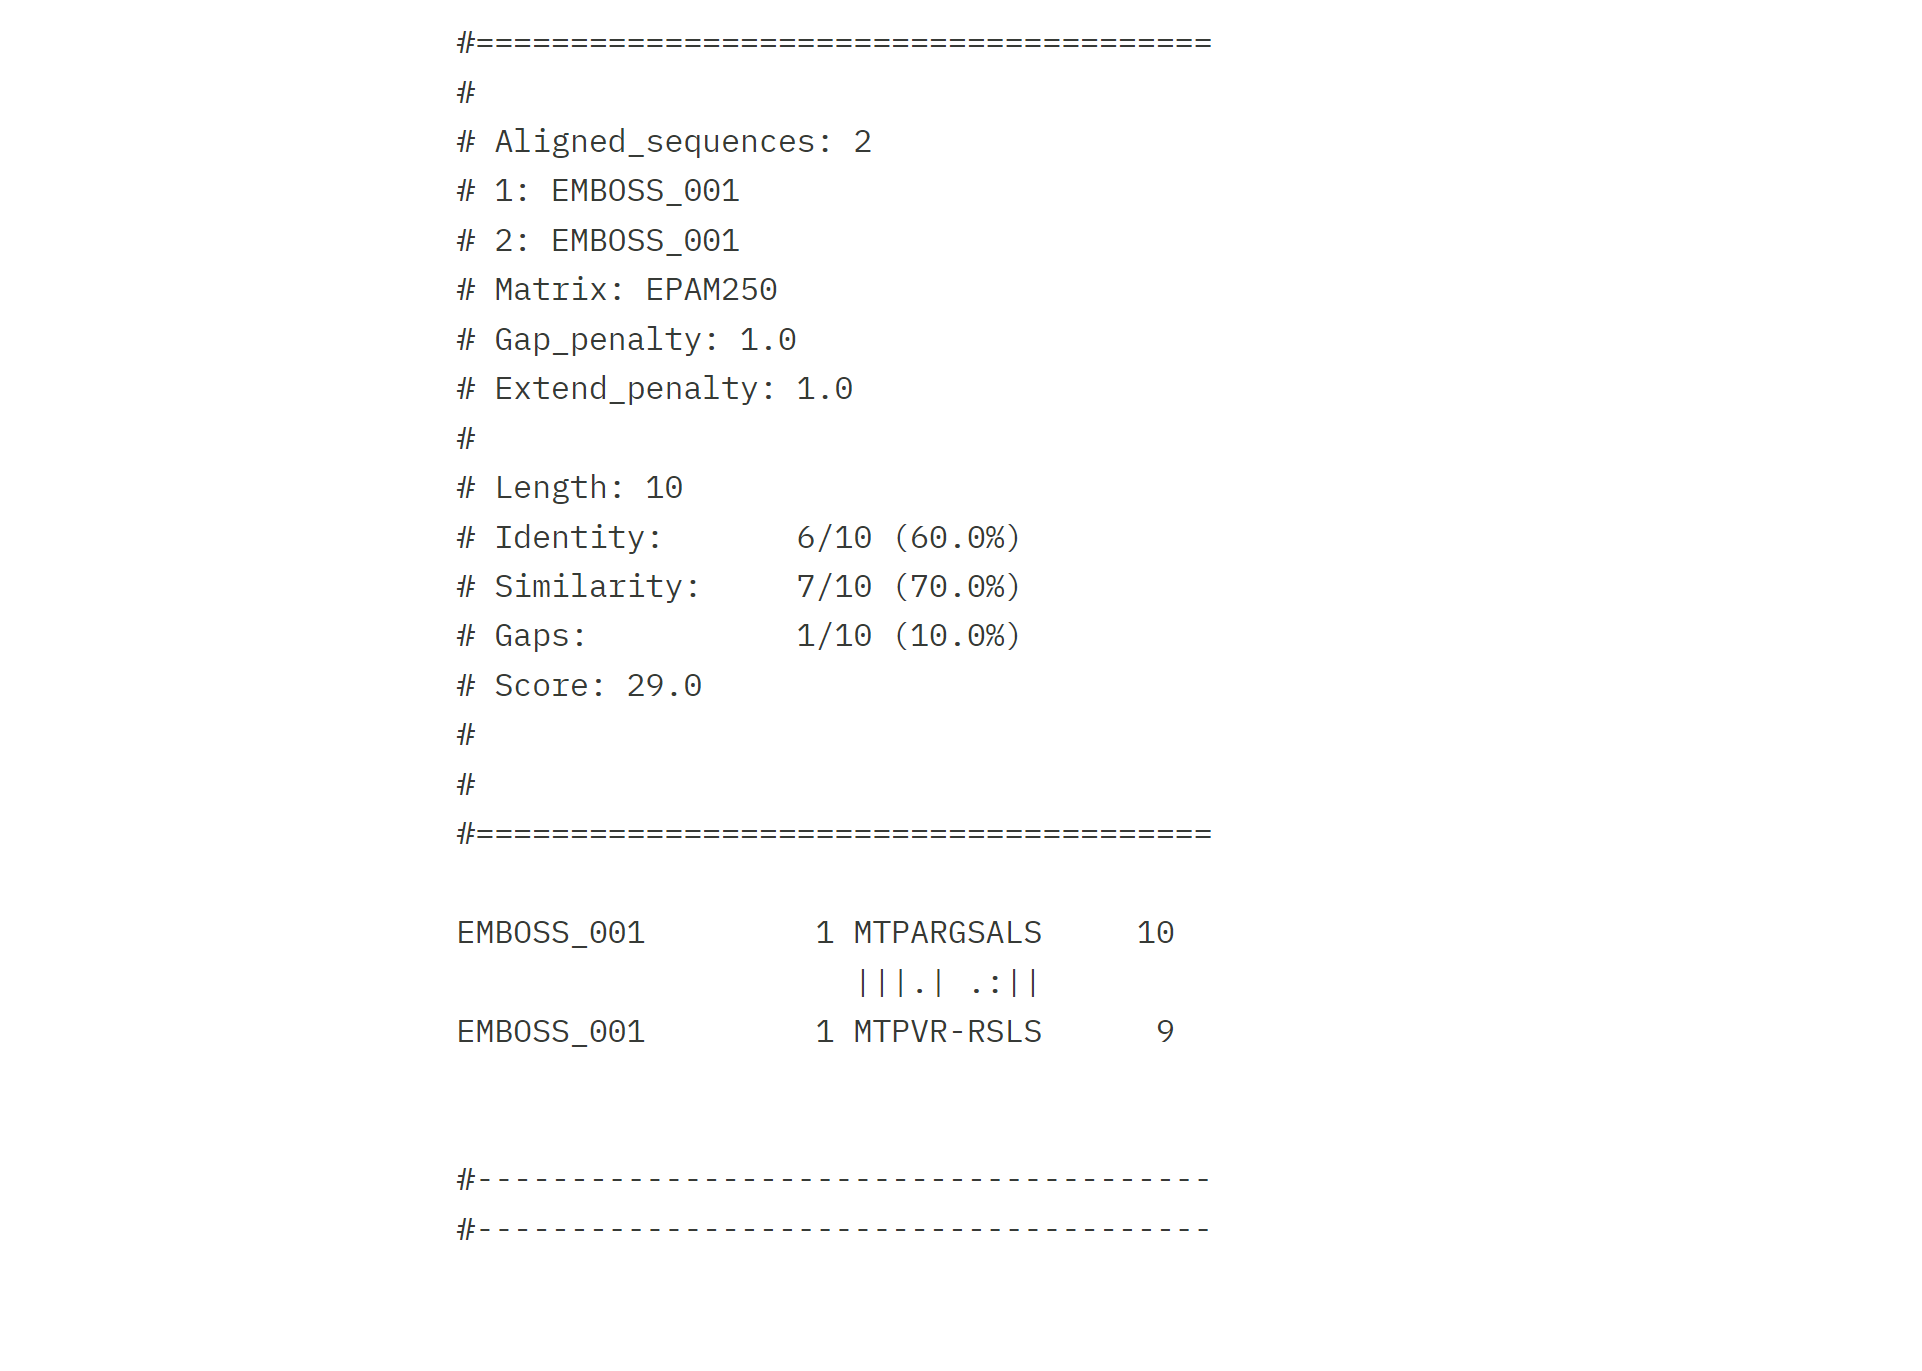

##### PAM30

Score = 48

optimal alignments = 1

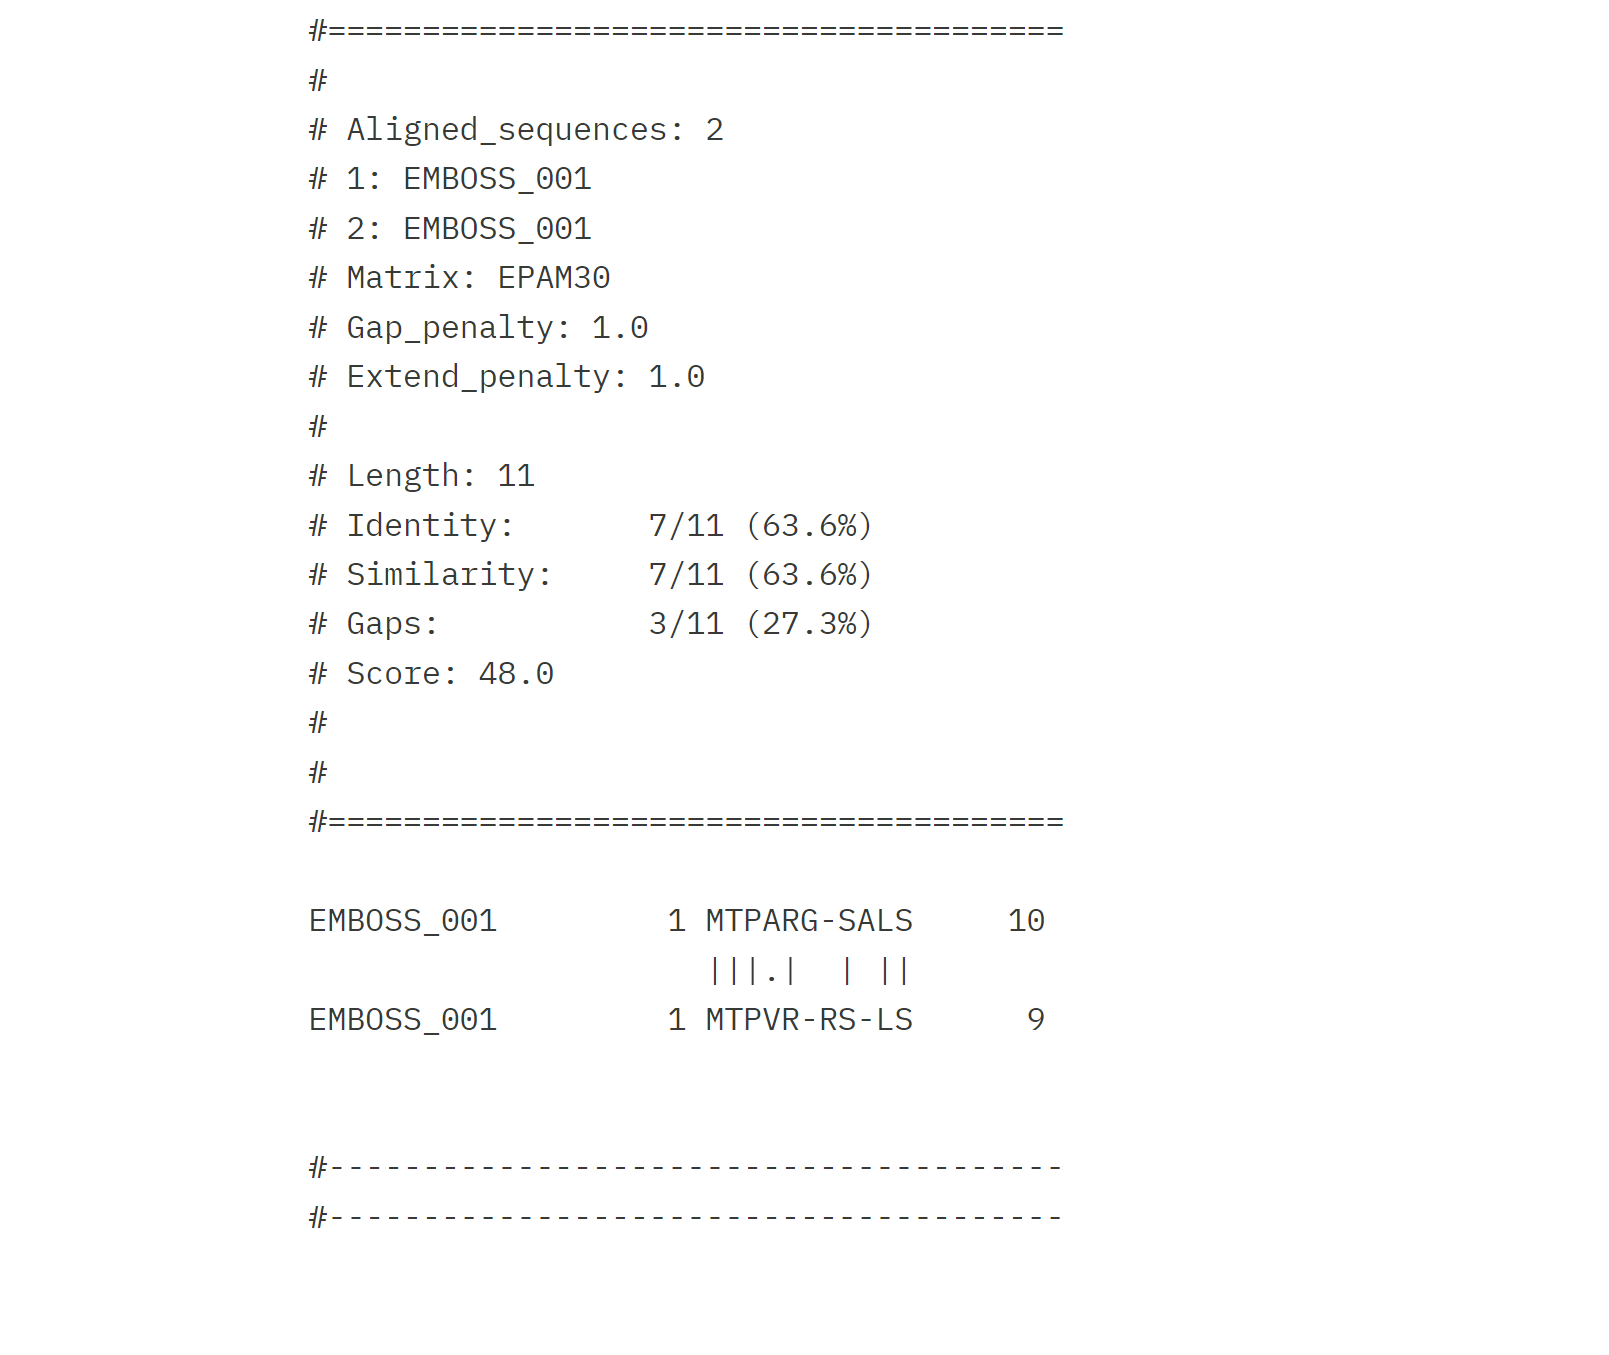

#### (3) Do the similarity matrices lead to similar alignments, or are their differences? Look at the three matrices and lookup how they were created. Describe your findings here.
Similarity matrices do not treat all mis-matches the same. For example, the A (alanine) and G (glycine) amino acids differ by just a single methyl group (CH3, one carbon and 3 hydrogens). They have similar structural and chemical properties. As a result, an A $\rightarrow$ G substitution is typically not penalized. On the contrast, an A to W (tryptophan) substitution constitutes a large change structurally and chemically and is more heavily penalized.

**G** (Glycine) | **A** (Alanine) | **W** (Tryptophan)
 -- | -- | -- |
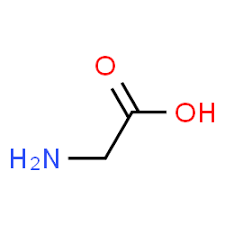 | 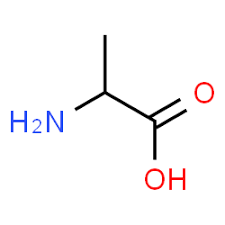 | 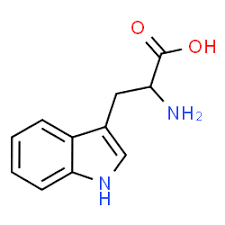

#### BLOSUM62:
It represents the 62% identity of the proteins used. So, the way it works is that there is matrix with scores for all the amino acids (20x20) and then there is a score assigned by moving from one amino acid to another

So when I calculated the score from the following matrix based on the alignment obtained using EMBOSS Needle Application with BLOSUM62 the score was 31 matching what I got from EMBOSS Needle 

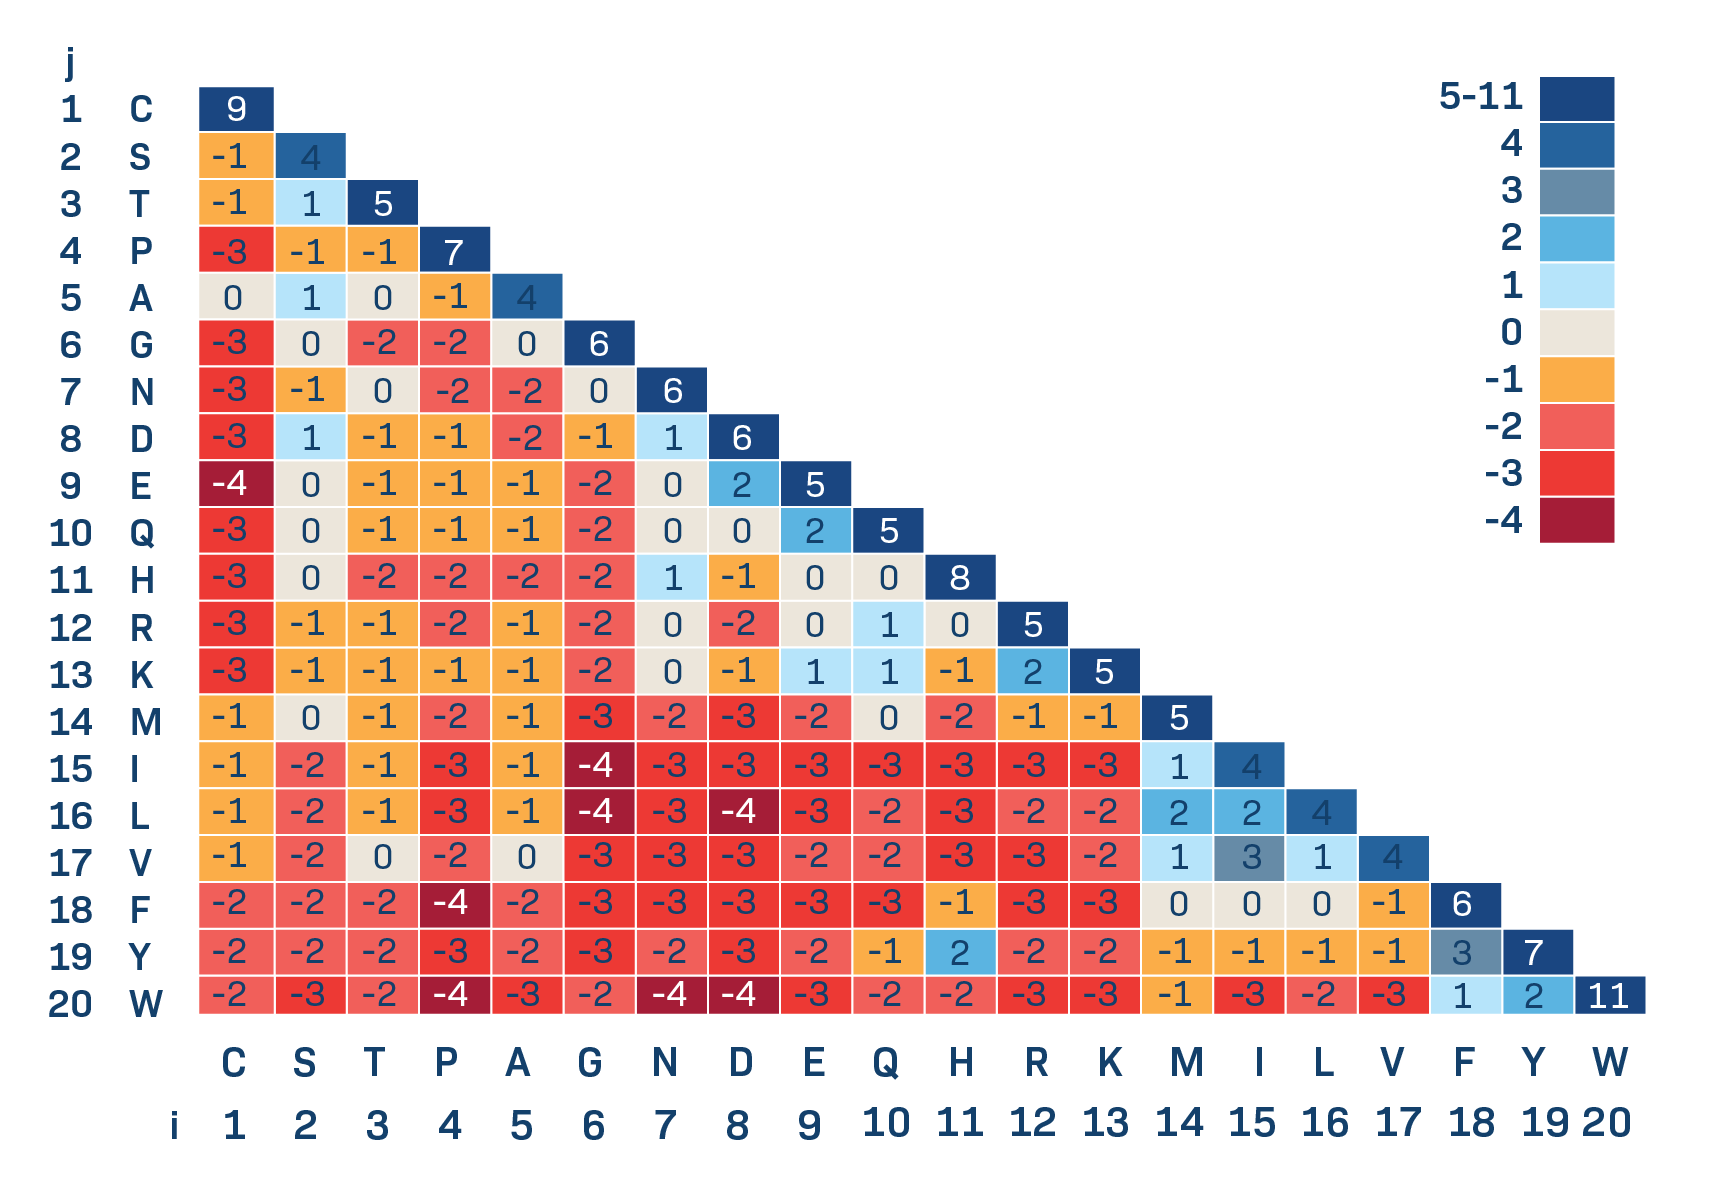

#### PAM250 and PAM30:
PAM is the Point Accepted Mutation which represent the mutation of an amino acid to anoter during evolution. So the PAM matrix is similar to the one for BLOSUM by including all amino acids but with different scores. So the number of PAM matrix represent the number of mutations per 100 amino acids. Then, 250 represent the 250 mutations per 100 amino acids (2.5 mutation per one amino acid and similarly for 30. So, 30 is looking for shorter distances while 250 is the opposite that is why we have a higher score for PAM30 than PAM250 becuase PAM250 penalize the mismatches higher than PAM30. Also, PAM30 will give higher score for mtaches because of the shorter scope it is looking for.

#### (4) Implement your own Needleman-Wunsch algorithm. Make the simplifying assumption that there is just a single optimal alignment. 
*If two moves lead to the same score, keep track of just one. In this situation, prioritize diagonal moves over vertical or lateral.*

`NeedlemanWunsch(seqX, seqY, match, mismatch, gap)`


In [1]:
import numpy as np

def NeedlemanWunsch(seqX, seqY, match, mismatch, gap):
    s = np.zeros(shape= (len(seqX)+1, len(seqY)+1))
    s_ar = np.empty((len(seqX)+1, len(seqY)+1), dtype = 'object') #for directions copy
    gap = -2
    for i in range(len(seqX)+1):
        s[0,i] = gap*i
        s[i,0] = gap*i
        

    for row in range(1,len(seqX)+1):
        for col in range(1,len(seqY)+1):
            diag = s[row-1,col-1]
            down = s[row-1,col]
            right = s[row,col-1]
            if seqX[row-1] == seqY[col-1]:
                diag +=match
            else:
                diag += mismatch
            right += gap
            down += gap
            m = max(diag, down, right)
            s[row,col] = m
            if m == diag:
                s_ar[row,col] = 'di'
            elif m == right:
                s_ar[row,col] = 'r'
            else:
                s_ar[row,col] = 'd'
            
    x_aln = ''
    y_aln = ''
    m = len(seqX)
    n = len(seqY)
    while m > 0 or n > 0:
        if s_ar[m,n] == 'di':
            x_aln = seqX[m-1] + x_aln
            y_aln = seqY[n-1] + y_aln
            m-=1
            n-=1
        elif s_ar[m,n] == 'd':
            x_aln = seqX[m-1] + x_aln
            y_aln = '-' + y_aln
            m-=1
        else:
            y_aln = seqY[n-1] + y_aln
            x_aln = '-' + x_aln
            n-=1
    
    
    return s, x_aln, y_aln


In [2]:
seq1 = "CACTGTA"
seq2 = "CATGTTA"
NeedlemanWunsch(seq1, seq2,1,-1,-2)

(array([[  0.,  -2.,  -4.,  -6.,  -8., -10., -12., -14.],
        [ -2.,   1.,  -1.,  -3.,  -5.,  -7.,  -9., -11.],
        [ -4.,  -1.,   2.,   0.,  -2.,  -4.,  -6.,  -8.],
        [ -6.,  -3.,   0.,   1.,  -1.,  -3.,  -5.,  -7.],
        [ -8.,  -5.,  -2.,   1.,   0.,   0.,  -2.,  -4.],
        [-10.,  -7.,  -4.,  -1.,   2.,   0.,  -1.,  -3.],
        [-12.,  -9.,  -6.,  -3.,   0.,   3.,   1.,  -1.],
        [-14., -11.,  -8.,  -5.,  -2.,   1.,   2.,   2.]]),
 'CACTG-TA',
 'CA-TGTTA')